In [ ]:
# DAY 22

In [ ]:
# Load the Iris dataset from iris.csv
# Encode the species column using LabelEncoder
# Separate features and labels
# Normalize the feature values using MinMaxScaler
# Split the dataset into training and testing sets (80/20)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./iris/iris.csv')

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
x=df.drop('Species',axis=1)
y=df['Species']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lab=LabelEncoder()
y_pred=lab.fit_transform(y)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
mms=MinMaxScaler()
feat=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
scal=MinMaxScaler()
norm=scal.fit_transform(df[feat])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# DAY23

In [ ]:
# Import and initialize the KNeighborsClassifier
# Train the KNN model with K=3
# Predict the labels for test data
# Print predicted vs actual species

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [59]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_prd=knn.predict(x_test)

In [61]:
print("Predicted species:", y_pred)
print("Actual species   :", list(y_test.values))

Predicted species: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Actual species   : ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa']


In [ ]:
# DAY 24

In [ ]:
# Evaluate model accuracy
# Display and visualize the confusion matrix
# Test different K values from 1 to 10
# Plot accuracy vs. K values

In [25]:
print("Accuracy:", accuracy_score(y_test,y_prd))

Accuracy: 1.0


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

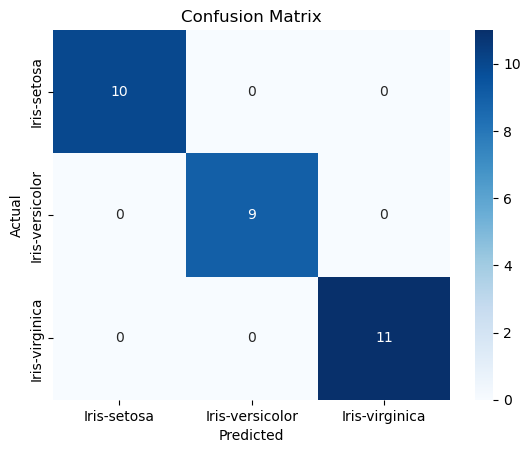

In [33]:
cm = confusion_matrix(y_test, y_prd)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
import numpy as np

In [54]:
k_list = []
acc_list = []

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    k_list.append(k)
    acc_list.append(acc)
    print(f"K = {k} ,, Accuracy = {acc:.2f}")

K = 1 ,, Accuracy = 1.00
K = 2 ,, Accuracy = 1.00
K = 3 ,, Accuracy = 1.00
K = 4 ,, Accuracy = 1.00
K = 5 ,, Accuracy = 1.00
K = 6 ,, Accuracy = 1.00
K = 7 ,, Accuracy = 1.00
K = 8 ,, Accuracy = 1.00
K = 9 ,, Accuracy = 1.00
K = 10 ,, Accuracy = 1.00


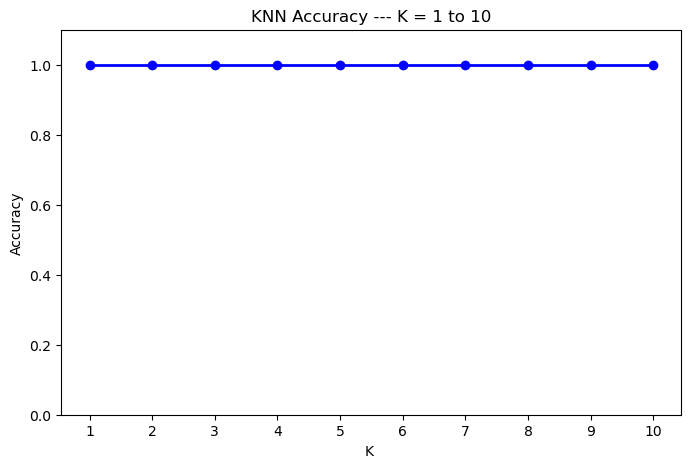

In [58]:
k_array = np.array(k_list)
acc_array = np.array(acc_list)

plt.figure(figsize=(8, 5))
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)
plt.title('KNN Accuracy --- K = 1 to 10')
plt.xlabel('K ')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.ylim(0, 1.1)
plt.show()


In [ ]:
# DAY 25

In [ ]:
# Try using only 2 features (e.g., petal_length and petal_width)
# Find the best K using GridSearchCV
# Save the final trained KNN model

In [63]:
X = df[[ 'PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'n_neighbors': list(range(1, 11))} 

grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [67]:
import joblib
knn_model = grid.best_estimator_
joblib.dump(knn_model, 'knn_best_model.pkl')

print("Model  saved --knn_best_model.pkl")


Model  saved --knn_best_model.pkl


In [ ]:
# DAY 26

In [ ]:
# Create a prediction function
# Export predictions to CSV

In [68]:
def predict_species(petal_length, petal_width):
    inputt = [[PetalLengthCm, PetalWidthCm]]
    pred = model.predict(inputt)
    return pred[0]

In [75]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [78]:
X = df[['Id', 'PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [81]:
predictions_df = pd.DataFrame({
   'Id': X_test['Id'],
   'PetalLengthCm': X_test['PetalLengthCm'],
   'PetalWidthCm': X_test['PetalWidthCm'],
   'Predicted_Species': y_pred
})

predictions_df.to_csv('predictions.csv', index=False)
print("Predictions exported to predictions.csv")


Predictions exported to predictions.csv
